# Draw minimum volume level set in 1D

In this example, we compute the minimum volume level set of a univariate distribution.

In [1]:
import openturns as ot

## With a Normal, minimum volume LevelSet

In [2]:
n = ot.Normal()

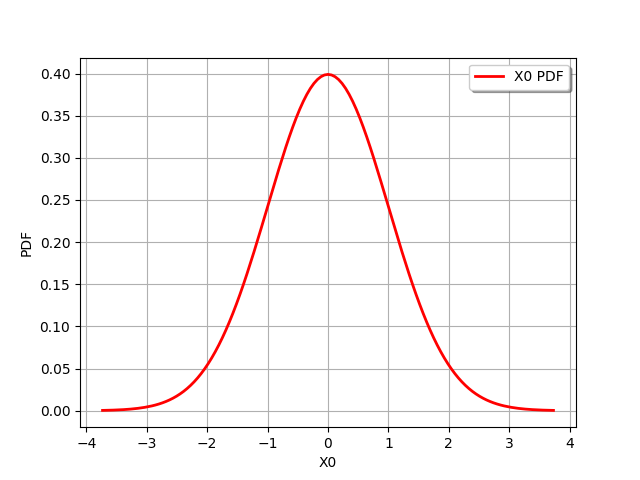

In [3]:
n.drawPDF()

We want to compute the minimum volume LevelSet which contains `alpha`=90% of the distribution. The `threshold` is the value of the PDF corresponding the `alpha`-probability: the points contained in the LevelSet have a PDF value lower or equal to this threshold.

In [4]:
alpha = 0.9
levelSet, threshold = n.computeMinimumVolumeLevelSetWithThreshold(alpha)
threshold

0.1031356403794346

The `LevelSet` has a `contains` method. Obviously, the point 0 is in the LevelSet.

In [5]:
levelSet.contains([0.])

True

In [6]:
def computeSampleInLevelSet(distribution, levelSet, sampleSize = 1000):
    '''
    Generate a sample from given distribution. 
    Extract the sub-sample which is contained in the levelSet.
    '''
    sample = distribution.getSample(sampleSize)
    dim = distribution.getDimension()
    # Get the list of points in the LevelSet.
    inLevelSet = []
    for x in sample:
        if levelSet.contains(x):
            inLevelSet.append(x)
    # Extract the sub-sample of the points in the LevelSet
    numberOfPointsInLevelSet = len(inLevelSet)
    inLevelSetSample = ot.Sample(numberOfPointsInLevelSet,dim)
    for i in range(numberOfPointsInLevelSet):
        inLevelSetSample[i] = inLevelSet[i]
    return inLevelSetSample

In [7]:
def from1Dto2Dsample(oldSample):
    '''
    Create a 2D sample from a 1D sample with zero ordinate (for the graph).
    '''
    size = oldSample.getSize()
    newSample = ot.Sample(size,2)
    for i in range(size):
        newSample[i,0] = oldSample[i,0]
    return newSample

In [8]:
def drawLevelSet1D(distribution, levelSet, alpha, threshold, sampleSize = 100):
    '''
    Draw a 1D sample included in a given levelSet.
    The sample is generated from the distribution.
    '''
    inLevelSample = computeSampleInLevelSet(distribution,levelSet,sampleSize)
    cloudSample = from1Dto2Dsample(inLevelSample)
    graph = distribution.drawPDF()
    mycloud = ot.Cloud(cloudSample)
    graph.add(mycloud)
    graph.setTitle("%.2f%% of the distribution, sample size = %d, " % (100*alpha, sampleSize))
    return graph

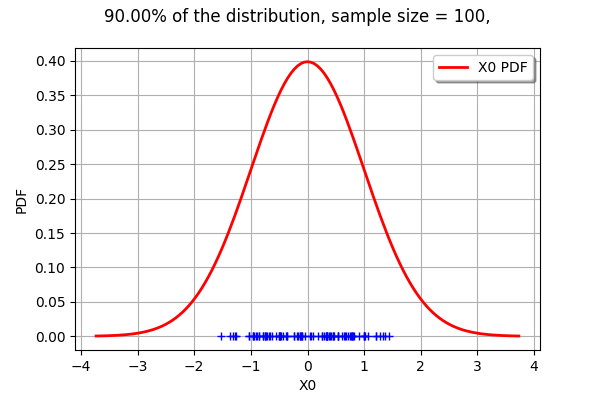

In [9]:
drawLevelSet1D(n, levelSet, alpha, threshold)

## With a Normal, minimum volume Interval

In [10]:
interval = n.computeMinimumVolumeInterval(alpha)
interval

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[-1.64485] upper bound=class=Point name=Unnamed dimension=1 values=[1.64485] finite lower bound=[1] finite upper bound=[1]

In [11]:
def drawPDFAndInterval1D(distribution, interval, alpha):
    '''
    Draw the PDF of the distribution and the lower and upper bounds of an interval.
    '''
    xmin = interval.getLowerBound()[0]
    xmax = interval.getUpperBound()[0]
    graph = distribution.drawPDF()
    yvalue = distribution.computePDF(xmin)
    curve = ot.Curve([[xmin,0.],[xmin,yvalue],[xmax,yvalue],[xmax,0.]])
    curve.setColor("black")
    graph.add(curve)
    graph.setTitle("%.2f%% of the distribution, lower bound = %.3f, upper bound = %.3f" % (100*alpha, xmin,xmax))
    return graph

The `computeMinimumVolumeInterval` returns an `Interval`.

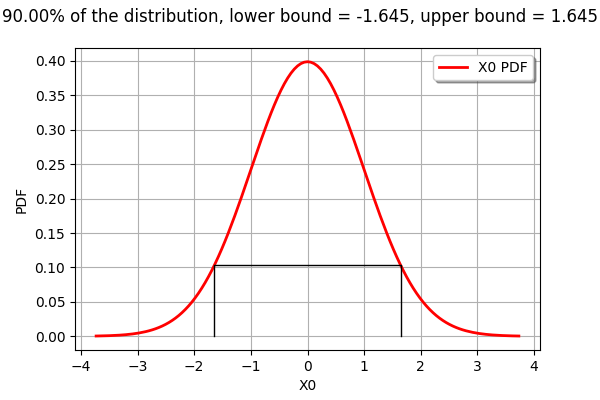

In [12]:
drawPDFAndInterval1D(n, interval, alpha)

## With a Mixture, minimum volume LevelSet

In [13]:
m = ot.Mixture([ot.Normal(-5.,1.),ot.Normal(5.,1.)],[0.2,0.8])

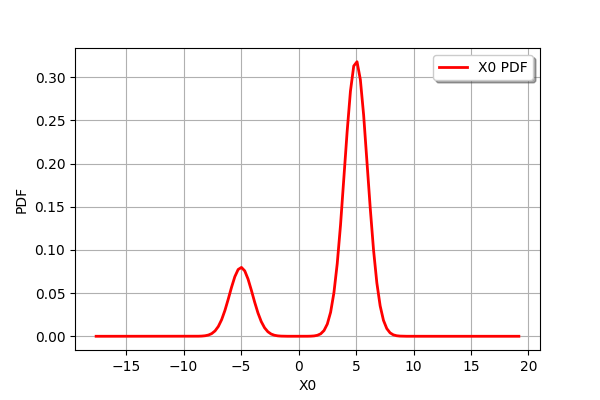

In [14]:
m.drawPDF()

In [15]:
alpha = 0.9
levelSet, threshold = m.computeMinimumVolumeLevelSetWithThreshold(alpha)
threshold

0.04667473141178894

The interesting point is that a `LevelSet` may be non-contiguous. In the current mixture example, this is not an interval.

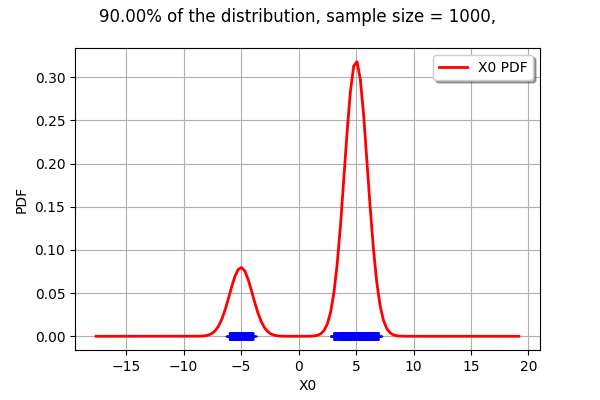

In [16]:
drawLevelSet1D(m, levelSet, alpha, threshold, 1000)

## With a Mixture, minimum volume Interval

In [17]:
interval = m.computeMinimumVolumeInterval(alpha)
interval

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[-5.44003] upper bound=class=Point name=Unnamed dimension=1 values=[6.72227] finite lower bound=[1] finite upper bound=[1]

The `computeMinimumVolumeInterval` returns an `Interval`. The bounds of this interval are different from the previous `LevelSet`.

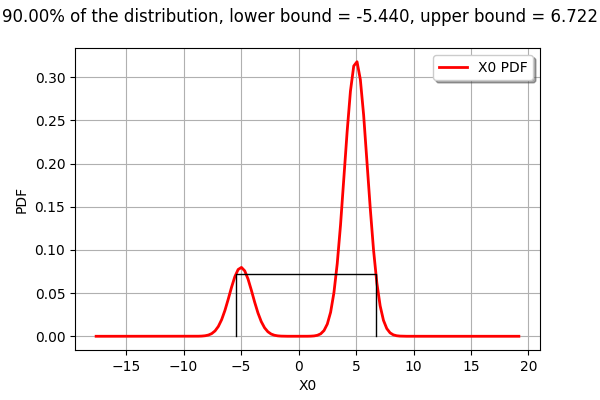

In [18]:
drawPDFAndInterval1D(m, interval, alpha)